This notebook shows multiple useful composites for applications.

In [1]:
from glob import glob
from satpy import Scene
from pyresample import load_area
from satpy import available_writers
import matplotlib.pyplot as plt
from satpy.writers import get_enhanced_image

/home/xin/miniconda3/lib/python3.9/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Read ABI L1 Full-Disk data

In [2]:
# read data
filenames = glob('../data/abi/OR_ABI-L1b*s20221822100*.nc')
scn = Scene(filenames, reader='abi_l1b')

## Check available datasets

In [3]:
scn.available_dataset_names()

['C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C08',
 'C09',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16']

In [4]:
# scn.show('C01')
# scn.save_dataset(filename='{sensor}_{name}_{start_time:%Y%m%d-%H%M%S}.png',
#                  base_dir='../figures/',
#                  dataset_id='C01',
#                  writer='simple_image')

In [5]:
scn.load(scn.available_dataset_names())

In [6]:
scn.save_datasets(filename='{sensor}_{name}_{start_time:%Y%m%d-%H%M%S}.png',
                  base_dir='../figures/',
                  writer='simple_image')

/home/xin/miniconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


## Check available composites

In [7]:
scn.all_composite_names()

['airmass',
 'ash',
 'cimss_cloud_type',
 'cimss_cloud_type_raw',
 'cimss_green',
 'cimss_green_sunz',
 'cimss_green_sunz_rayleigh',
 'cimss_true_color',
 'cimss_true_color_sunz',
 'cimss_true_color_sunz_rayleigh',
 'cira_day_convection',
 'cira_fire_temperature',
 'cloud_phase',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloud_phase_raw',
 'cloudtop',
 'color_infrared',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_abi',
 'day_microphysics_eum',
 'dust',
 'fire_temperature_awips',
 'fog',
 'green',
 'green_crefl',
 'green_nocorr',
 'green_raw',
 'green_snow',
 'highlight_C14',
 'ir108_3d',
 'ir_cloud_day',
 'land_cloud',
 'land_cloud_fire',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'night_microphysics_abi',
 'overview',
 'overview_raw',
 'snow',
 'snow_fog',
 'so2',
 'tropical_airmass',
 'tru

## Load composites

In [8]:
scn.load(["C13", "true_color", "true_color_nocorr", "airmass", "cloud_phase", "colorized_ir_clouds", "cira_fire_temperature"])

The following datasets were not created and may require resampling to be generated: DataID(name='cira_fire_temperature'), DataID(name='true_color_nocorr'), DataID(name='true_color'), DataID(name='cloud_phase')


Satpy knows that the reason it wasn't able to generate this composite was because the data was not all the same resolution. The Scene knows that we need to resample before we can be able to generate this composite. Let's do that now by using the native resampler. We'll also use the min_area method to aggregate the data to the lowest resolution in the Scene.

## Resample data to the lowest resolution

In [9]:
new_scn = scn.resample(scn.min_area(), resampler='native')
new_scn['true_color']

/home/xin/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<xarray.DataArray 'concatenate-fc53ba924e43dc5e094f4106609cf03d' (bands: 3,
                                                                  y: 5424,
                                                                  x: 5424)>
dask.array<concatenate, shape=(3, 5424, 5424), dtype=float64, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 5.434e+06 5.432e+06 5.43e+06 ... -5.432e+06 -5.434e+06
  * x        (x) float64 -5.434e+06 -5.432e+06 -5.43e+06 ... 5.432e+06 5.434e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes:
    timeline_ID:             None
    scene_abbr:              F
    grid_mapping:            goes_imager_projection
    ancillary_variables:     []
    scene_id:                Full Disk
    orbital_parameters:      {'projection_longitude': -137.0, 'projection_lat...
    instrument_ID:           FM2
    sensor:                  abi
    standard_name:           true_color
    orbital_slot:            GOES-West
    production_site:         WCDAS
    scan_mode:               M6
    end_time:                2022-07-01 21:09:38.800000
    platform_shortname:      G17
    reader:                  abi_l1b
    long_name:               Bidirectional Reflectance
    area:                    Area ID: GOES-West\nDescription: 2km at nadir\nP...
    start_time:              2022-07-01 21:00:32.100000
    observation_type:        Rad
    platform_name:           GOES-17
    cell_methods:            t: point area: point
    wavelength:              None
    resolution:              500
    _satpy_id:               DataID(name='true_color', resolution=500)
    name:                    true_color
    prerequisites:           [DataQuery(name='C02', modifiers=('sunz_correcte...
    optional_prerequisites:  []
    mode:                    RGB

## Export all images

In [10]:
new_scn.save_datasets(filename='{sensor}_{name}_{start_time:%Y%m%d-%H%M%S}.png',
                      base_dir='../figures/',
                      writer='simple_image')

# you can also specify the composite to save
## new_scn.save_dataset('true_color', '../figures/abi_true_color.png')

/home/xin/miniconda3/lib/python3.9/site-packages/satpy/resample.py:949: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/home/xin/miniconda3/lib/python3.9/site-packages/satpy/composites/__init__.py:1010: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))
/home/xin/miniconda3/lib/python3.9/site-packages/satpy/resample.py:949: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/home/xin/miniconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in remainder
  return func(*(_execute_task(a, cache) for a in args))
/home/xin/miniconda3/lib/python3.9/site-packages/satpy/composites/__init__.py:1010: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))
/home/xin/miniconda3/lib/python3.9/site-packages/satpy/resample.py:949: RuntimeWarning: Mean of empty slice


I choose `simple_image` writer above. Users can choose any other writer:

In [11]:
available_writers()

Could not import writer config from: ['/home/xin/miniconda3/lib/python3.9/site-packages/satpy/etc/writers/ninjotiff.yaml']


['ninjogeotiff', 'awips_tiled', 'simple_image', 'mitiff', 'geotiff', 'cf']

## Resample data to Alaska

In [12]:
area_alaska = load_area('../scripts/test_areas.yaml', 'alaska_2km')
scn_alaska = scn.resample(area_alaska)

Save image without overlay:

In [13]:
scn_alaska.save_datasets(filename='{sensor}_{name}_alaska_{start_time:%Y%m%d-%H%M%S}.png',
                         base_dir='../figures/',
                         datasets=['cira_fire_temperature', 'true_color'],
                         writer='simple_image')

Define overplays:

In [14]:
coast = {'coast_dir': '../data/gshhs/',
         'color': (255, 255, 0), 'width': 1.0, 'resolution': 'i'}

grid  = {'grid': {'major_lonlat': (10,10), 'minor_lonlat': (5, 5),
        # Opacity 0 will hide the line, values 0 ... 255  EL
        'outline': (255, 255, 255) , 'outline_opacity': 175,
        'minor_outline': (200, 200, 200),'minor_outline_opacity': 127,
        'width': 1.0, 'minor_width': 0.5, 'minor_is_tick': 1,
        'write_text': True, 'lat_placement': 'lr', 'lon_placement': 'b',
        'font': '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', 'font_size': 20, 'fill': 'white'}} # minor is line not a tick! EL
        # label placement l,r,lr for latitude and t,b,tb for longitude

## Add overlay by Satpy

In [15]:
scn_alaska.save_datasets(filename='{sensor}_{name}_alaska_coast_{start_time:%Y%m%d-%H%M%S}.png',
                         base_dir='../figures/',
                         datasets=['cira_fire_temperature', 'true_color'],
                         overlay = {**coast, **grid},
                         writer='simple_image')

/home/xin/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/home/xin/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


## Add overlay and own colormap

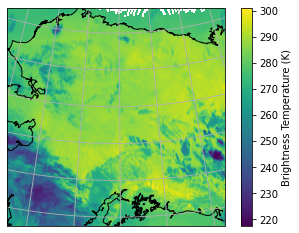

In [16]:
crs = scn_alaska['C13'].attrs['area'].to_cartopy_crs()

ax = plt.axes(projection=crs)
plt.imshow(scn_alaska['C13'], transform=crs, extent=crs.bounds, origin='upper')
cbar = plt.colorbar()
cbar.set_label('Brightness Temperature (K)')
ax.coastlines()
ax.gridlines()

## Proplot

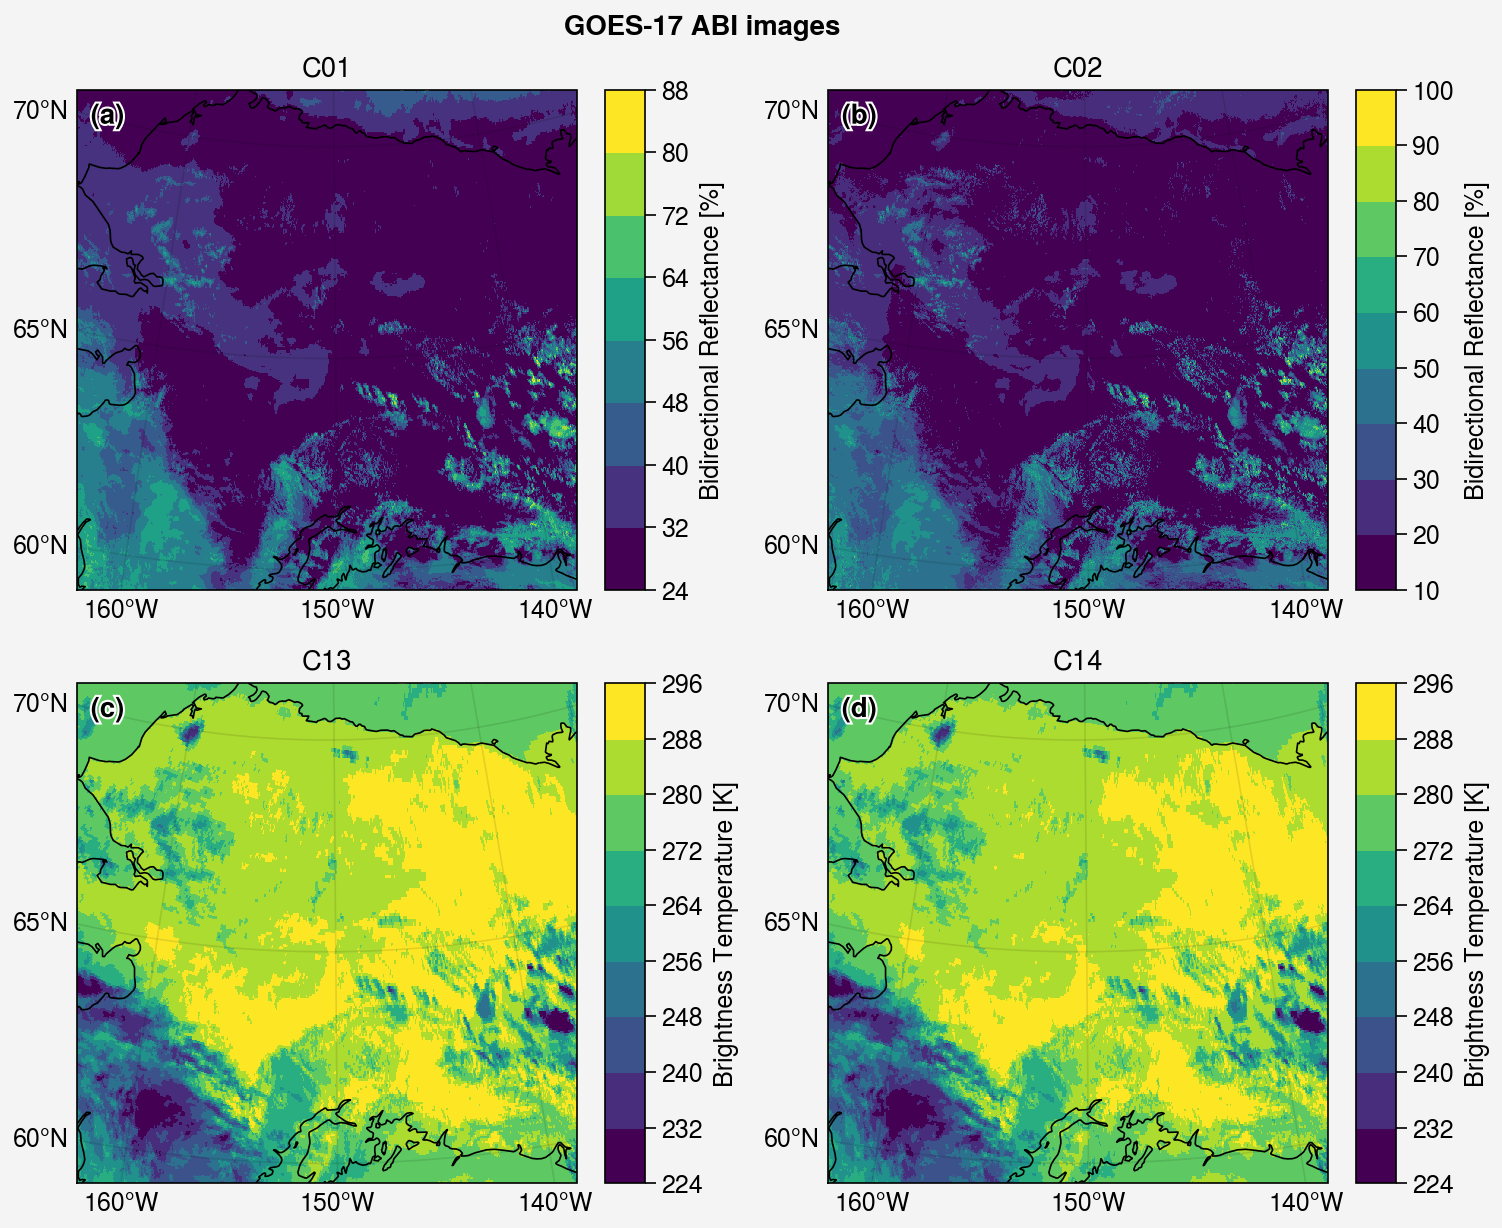

In [17]:
import proplot as pplt

crs = scn_alaska['C01'].attrs['area'].to_cartopy_crs()

fig, axs = pplt.subplots(proj=crs, nrows=2, ncols=2)

scn_alaska['C01'].plot(ax=axs[0], transform=crs)
scn_alaska['C02'].plot(ax=axs[1], transform=crs)
scn_alaska['C13'].plot(ax=axs[2], transform=crs)
scn_alaska['C14'].plot(ax=axs[3], transform=crs)

axs.format(reso='med', coast=True,
           latlines=5, lonlines=10, labels=True,
           title=['C01', 'C02', 'C13', 'C14'],
           suptitle='GOES-17 ABI images',
           abc='(a)', abcloc='ul',)

In [27]:
from satpy.writers import get_enhanced_image

# get lon/lat
lon_alaska, lat_alaska = scn_alaska['true_color'].area.get_lonlats()

# get enhanced image
img_array = get_enhanced_image(scn_alaska['true_color']).data.clip(0, 1).load()

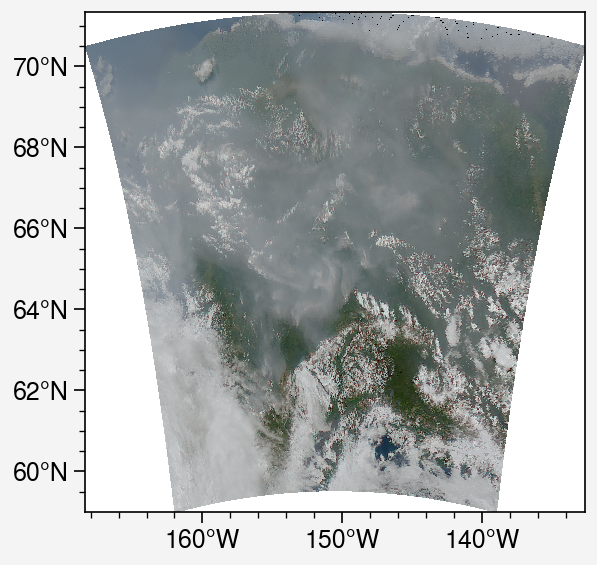

In [36]:
fig, axs = pplt.subplots()

# Plot data using pcolormesh
#    https://stackoverflow.com/a/70542023/7347925
m = axs.pcolormesh(lon_alaska, lat_alaska, img_array[0, :, :],
facecolor = img_array.transpose('y', 'x','bands').values.reshape(-1, 3))

# This is necessary to let the `color` argument determine the color
m.set_array(None)

axs.format(xformatter='deglon', yformatter='deglat', grid=False)

fig.savefig('../figures/proplot_true_color.png')

It's also possible to plot unresampled regional data with any projection:

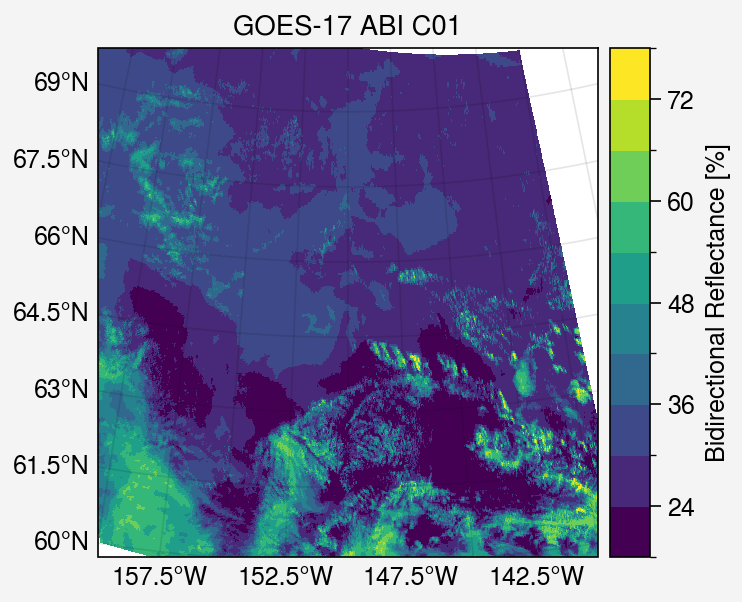

In [52]:
import cartopy.crs as ccrs

# crop data to lon/lat region
scn_crop = scn.crop(ll_bbox=(-160, 60, -140, 70))
crs_crop = scn_crop['C01'].attrs['area'].to_cartopy_crs()

# set plotting projection
crs_plot = ccrs.LambertAzimuthalEqualArea(central_latitude=65, central_longitude=-150)
fig, axs = pplt.subplots(proj=crs_plot)
scn_crop['C01'].plot(ax=axs, transform=crs_crop)

axs.format(lonlim=(-160, -140), latlim=(60, 70), labels=True, title='GOES-17 ABI C01')

fig.savefig('../figures/proplot_scn_crop.png')